<a href="https://colab.research.google.com/github/SaiDhanyaa/ExcelR/blob/main/SALARY_HIKE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2) Salary_hike -> Build a prediction model for Salary_hike**
# **Build a simple linear regression model by performing EDA and do necessary **Transformations and select the best model using R or Python. 

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
data = pd.read_csv('/content/Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [87]:
#last few row of the data set
data.tail(10)

,YearsExperience,Salary
20,6.8,91738.0
21,7.1,98273.0
22,7.9,101302.0
23,8.2,113812.0
24,8.7,109431.0
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [88]:
#data structure
data.shape

(30, 2)

In [89]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [90]:
#data types
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# **TO FIND DUPLICATES**

In [92]:
 data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [93]:
data[ data.duplicated()].shape

(0, 2)

In [94]:
# there is no duplicated row

# **RENAME COLUMNS**

In [95]:
data=data.rename({'YearsExperience':'Y'},axis=1)
data=data.rename({'Salary':'S'},axis=1)

In [96]:
data.head()

,Y,S
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## **CORRELATION**

In [97]:
data.corr()

,Y,S
Y,1.000000,0.978242
S,0.978242,1.000000


In [98]:
####distribution plot of YearsExperience	Salary

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


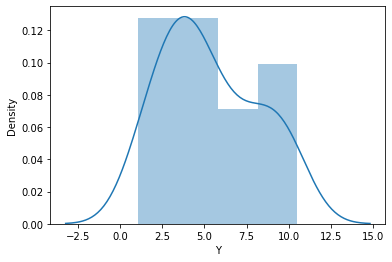

In [99]:
import seaborn as sns
sns.distplot(data['Y'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


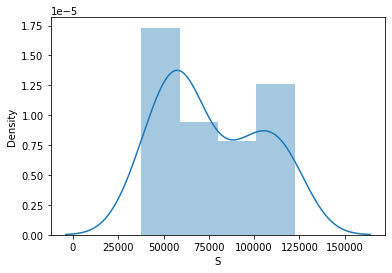

In [100]:
import seaborn as sns
sns.distplot(data['S'])

## **OUTLIER DETECTION**

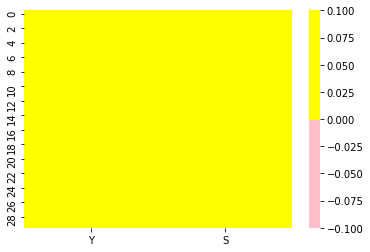

In [101]:
cols = data.columns 
colours = ['#ffc0cb', '#ffff00']
sns.heatmap(data[cols].isnull(),
            cmap=sns.color_palette(colours))

(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <a list of 10 Patch objects>)

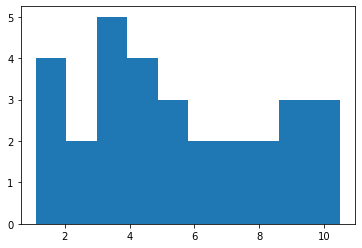

In [102]:
#USING HISTOGRAM
plt.hist(data.Y)

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <a list of 10 Patch objects>)

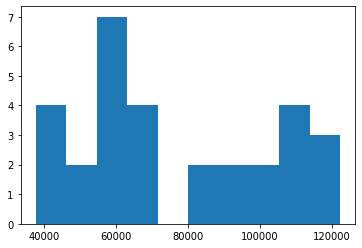

In [103]:
#USING HISTOGRAM
plt.hist(data.S)

{'boxes': [<matplotlib.lines.Line2D at 0x7f2007a2f750>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2007a337d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2007a3b810>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2007a3b2d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2007a18b50>,
  <matplotlib.lines.Line2D at 0x7f2007a33290>]}

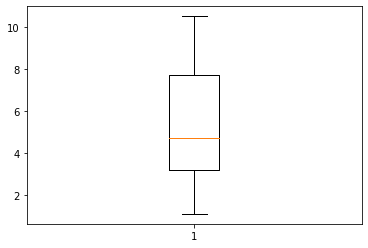

In [104]:
plt.boxplot(data.Y)

{'boxes': [<matplotlib.lines.Line2D at 0x7f2007997110>,
 'caps': [<matplotlib.lines.Line2D at 0x7f20079a0190>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f20079a71d0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f20079a0c50>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2007985510>,
  <matplotlib.lines.Line2D at 0x7f20079b0110>]}

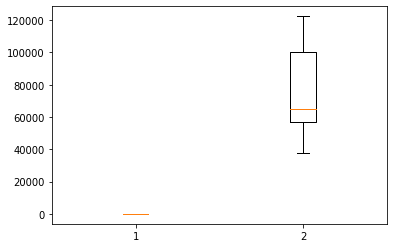

In [105]:
plt.boxplot(data.T)

In [106]:
#descriptive stst
data.describe()

,Y,S
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [107]:
##NO OUTLIERS

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       30 non-null     float64
 1   S       30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [109]:
###NO NaN VALUES

## **FITTING REGRESSION MODEL**

In [110]:
 import statsmodels.formula.api as smf
 model=smf.ols("S~Y", data= data).fit()

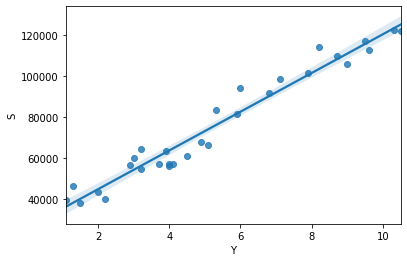

In [111]:
sns.regplot(x="Y", y="S", data=data);

# **[COEFFICIENTS] beta0 and beta1**

In [112]:
model.params

Intercept    25792.200199
Y             9449.962321
dtype: float64

In [113]:
### Bo==intercept,  Bo1-- Y 

In [114]:
###t values and p-values
print(model.tvalues, '\n', model.pvalues)

Intercept    11.346940
Y            24.950094
dtype: float64 
 Intercept    5.511950e-12
Y            1.143068e-20
dtype: float64


## **##R^2 values**

In [115]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [116]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      S   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 16 Sep 2021   Prob (F-statistic):           1.14e-20
Time:                        17:32:33   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
Y           9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **THUS , WE GOT THE RSQUARED VALUE. WITH REGRESSION MODEL OF 95.7% ACCURACY which is excellent model to be relied upon** 

# **# # Predict for new data point**

In [117]:
#Predict SALARY for 14 and 20 YEARS OF EXPERIENCE

In [118]:
newdata=pd.Series([14,20])

In [119]:
datapred=pd.DataFrame(newdata,columns=['Y'])
datapred

,Y
0,14
1,20


In [120]:
yhat=model.predict(datapred)
yhat

0    158091.672699
1    214791.446628
dtype: float64

# **for 14 and 20 YEARS OF EXPERIENCE, PREDICTE/ EXPECTED SALARY would  be 158091.672699 AND 214791.446628 respectively**